## 分类准确度

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target

In [6]:
y.shape

(1797,)

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [10]:
X[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [11]:
some_digit = X[666]

In [12]:
y[666]

0

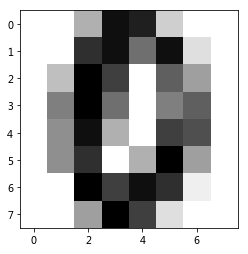

In [13]:
# 绘图
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [14]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)

In [15]:
from playML.kNN import KNNClassifier

my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

In [16]:
y_predict

array([2, 0, 0, 6, 2, 7, 5, 8, 6, 9, 9, 4, 1, 2, 7, 3, 5, 0, 0, 5, 2, 4,
       0, 5, 4, 2, 1, 4, 2, 0, 9, 9, 8, 3, 8, 5, 3, 6, 0, 5, 0, 9, 1, 4,
       0, 4, 0, 7, 2, 9, 2, 8, 4, 5, 7, 8, 9, 8, 8, 1, 4, 4, 1, 4, 0, 1,
       8, 9, 9, 5, 3, 3, 5, 1, 1, 5, 7, 0, 8, 2, 2, 9, 3, 9, 9, 8, 9, 9,
       2, 0, 0, 7, 9, 1, 7, 6, 0, 1, 1, 6, 5, 0, 2, 3, 7, 1, 5, 2, 1, 8,
       8, 9, 7, 2, 9, 0, 4, 1, 1, 3, 5, 0, 0, 1, 9, 5, 0, 9, 6, 1, 0, 3,
       3, 4, 5, 9, 1, 2, 8, 0, 2, 1, 7, 3, 0, 9, 7, 9, 0, 0, 0, 2, 7, 2,
       8, 7, 0, 4, 7, 0, 3, 4, 5, 3, 6, 0, 7, 6, 1, 8, 3, 8, 4, 9, 5, 1,
       7, 1, 3, 4, 4, 2, 2, 0, 8, 3, 0, 5, 0, 6, 4, 6, 8, 5, 4, 4, 6, 6,
       4, 9, 7, 5, 4, 0, 3, 8, 6, 2, 3, 9, 3, 4, 7, 8, 2, 3, 9, 9, 0, 6,
       2, 5, 2, 5, 2, 1, 6, 6, 9, 2, 4, 5, 2, 8, 9, 1, 9, 0, 3, 6, 2, 6,
       0, 8, 3, 5, 6, 9, 5, 1, 8, 5, 2, 8, 6, 9, 9, 4, 3, 6, 8, 7, 4, 4,
       3, 3, 5, 0, 6, 7, 1, 5, 8, 1, 3, 1, 0, 0, 9, 8, 9, 0, 7, 7, 2, 3,
       0, 3, 0, 8, 8, 8, 5, 8, 3, 1, 4, 3, 8, 3, 0,

In [17]:
sum(y_predict == y_test) / len(y_test)

0.9832869080779945

## 封装自己的 accuracy_score

In [18]:
from playML.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9832869080779945

In [19]:
my_knn_clf.score(X_test, y_test)

0.9832869080779945

## scikit-learn中的accuracy_score

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9888888888888889

In [23]:
knn_clf.score(X_test, y_test)

0.9888888888888889